In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import os
from env import host, user, password
import wrangle

In [2]:
df = wrangle.wrangle_zillow()
df

,bedroomcnt,bathroomcnt,taxvaluedollarcnt,yearbuilt,taxamount,fips,calfinishedsqft
4,4.0,2.0,296425.0,2005.0,6941.39,6037.0,3633.0
7,3.0,2.0,646760.0,1926.0,7924.68,6037.0,2077.0
18,3.0,1.0,169471.0,1950.0,2532.88,6037.0,1244.0
19,3.0,2.0,233266.0,1950.0,3110.99,6037.0,1300.0
20,3.0,2.0,290492.0,1951.0,3870.25,6037.0,1222.0
...,...,...,...,...,...,...,...
2152852,3.0,2.0,408680.0,1946.0,4341.32,6111.0,1917.0
2152853,4.0,2.0,259913.0,1955.0,3175.66,6059.0,1987.0
2152855,3.0,2.5,405547.0,2012.0,4181.10,6059.0,1809.0
2152858,4.0,3.0,960756.0,2015.0,13494.52,6059.0,2262.0


In [3]:
df.shape

(1854141, 7)

In [4]:
df.yearbuilt = df.yearbuilt.astype('object')
df.yearbuilt.dtypes

dtype('O')

In [5]:
df.fips = df.fips.astype('object')
df.fips.dtypes

dtype('O')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1854141 entries, 4 to 2152861
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   bedroomcnt         float64
 1   bathroomcnt        float64
 2   taxvaluedollarcnt  float64
 3   yearbuilt          object 
 4   taxamount          float64
 5   fips               object 
 6   calfinishedsqft    float64
dtypes: float64(5), object(2)
memory usage: 113.2+ MB


In [7]:
df['tax_value'] = df.taxvaluedollarcnt
df = df.drop(columns='taxvaluedollarcnt')
df.head()

,bedroomcnt,bathroomcnt,yearbuilt,taxamount,fips,calfinishedsqft,tax_value
4,4.0,2.0,2005.0,6941.39,6037.0,3633.0,296425.0
7,3.0,2.0,1926.0,7924.68,6037.0,2077.0,646760.0
18,3.0,1.0,1950.0,2532.88,6037.0,1244.0,169471.0
19,3.0,2.0,1950.0,3110.99,6037.0,1300.0,233266.0
20,3.0,2.0,1951.0,3870.25,6037.0,1222.0,290492.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1854141 entries, 4 to 2152861
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   bedroomcnt       float64
 1   bathroomcnt      float64
 2   yearbuilt        object 
 3   taxamount        float64
 4   fips             object 
 5   calfinishedsqft  float64
 6   tax_value        float64
dtypes: float64(5), object(2)
memory usage: 113.2+ MB


In [9]:
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [10]:
df = remove_outliers(df, 1, df.columns)

In [11]:
df.shape

(666078, 7)

# Scalling Exercises


1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [12]:
from scipy import stats
from sklearn.model_selection import train_test_split

In [13]:
def train_validate_test_split(df, seed=123):
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed)
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed)
    return train, validate, test

In [14]:
train, validate, test = train_validate_test_split(df, seed=123)
train.shape, validate.shape, test.shape

((373003, 7), (159859, 7), (133216, 7))

<AxesSubplot:ylabel='Frequency'>

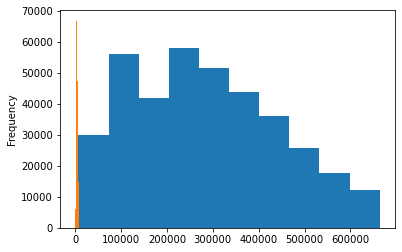

In [15]:
train.tax_value.plot.hist(bins=10)
train.taxamount.plot.hist(bins=10)

<AxesSubplot:xlabel='tax_value', ylabel='Count'>

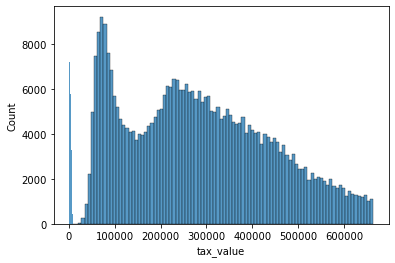

In [16]:
sns.histplot(x=train.tax_value)
sns.histplot(x=train.taxamount)

In [17]:
train.tax_value.min()

6778.0

In [18]:
train.tax_value.max()

663778.0

<AxesSubplot:xlabel='tax_value', ylabel='Density'>

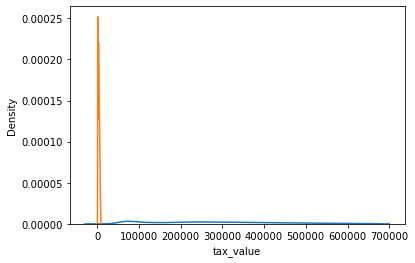

In [19]:
sns.kdeplot(x = train.tax_value, label = 'Tax_Value')
sns.kdeplot(x = train.taxamount, label = 'Tax_Amount')

# Min-Max Scalar

In [20]:
import sklearn.preprocessing

In [21]:
# 1. create the object
scaler = sklearn.preprocessing.MinMaxScaler()

# 2. fit the object (learn the min and max value)
scaler.fit(train[['tax_value', 'taxamount']])

# 3. use the object (use the min, max to do the transformation)

scaled_tax = scaler.transform(train[['tax_value', 'taxamount']])
scaled_tax[:10]

array([[0.29204871, 0.42823426],
       [0.96058752, 0.88415472],
       [0.31646423, 0.32094098],
       [0.11175038, 0.18872441],
       [0.33569559, 0.33248226],
       [0.27235921, 0.27907093],
       [0.09583409, 0.12717092],
       [0.26854795, 0.22972949],
       [0.70049011, 0.63353369],
       [0.32274734, 0.34088415]])

In [22]:
train[['tax_value_scaled', 'taxamount_scaled']] = scaled_tax

In [23]:
train.head()

,bedroomcnt,bathroomcnt,yearbuilt,taxamount,fips,calfinishedsqft,tax_value,tax_value_scaled,taxamount_scaled
1705953,4.0,2.0,1954.0,3614.56,6037.0,1071.0,198654.0,0.292049,0.428234
1869634,3.0,2.0,1957.0,7441.26,6037.0,1641.0,637884.0,0.960588,0.884155
200490,3.0,2.0,1941.0,2714.01,6037.0,1611.0,214695.0,0.316464,0.320941
1069665,4.0,2.0,1962.0,1604.27,6037.0,1620.0,80198.0,0.111750,0.188724
1762774,3.0,2.0,1955.0,2810.88,6059.0,1345.0,227330.0,0.335696,0.332482


In [24]:
# make new scaled columns for validate and test (transform only)

test[['tax_value_scaled', 'taxamount_scaled']] = scaler.transform(test[['tax_value', 'taxamount']])
validate[['tax_value_scaled', 'taxamount_scaled']] = scaler.transform(validate[['tax_value', 'taxamount']])

In [25]:
test.head()

,bedroomcnt,bathroomcnt,yearbuilt,taxamount,fips,calfinishedsqft,tax_value,tax_value_scaled,taxamount_scaled
1118368,3.0,2.0,1957.0,6127.28,6059.0,1450.0,521502.0,0.783446,0.727605
106605,3.0,2.0,1965.0,5353.68,6059.0,1144.0,517767.0,0.777761,0.635436
1283559,3.0,2.0,1988.0,2555.72,6037.0,1509.0,132738.0,0.191720,0.302082
200228,3.0,2.0,1957.0,4322.10,6037.0,1128.0,330085.0,0.492096,0.512532
1924098,4.0,2.0,1957.0,3903.92,6059.0,1552.0,324583.0,0.483721,0.462709


In [26]:
validate.head()

,bedroomcnt,bathroomcnt,yearbuilt,taxamount,fips,calfinishedsqft,tax_value,tax_value_scaled,taxamount_scaled
1418148,3.0,2.5,1962.0,6971.62,6059.0,2085.0,609150.0,0.916852,0.828201
467106,3.0,2.0,1957.0,708.28,6037.0,1075.0,56488.0,0.075662,0.081974
1725248,3.0,2.0,1936.0,5695.08,6037.0,1340.0,450457.0,0.675311,0.676111
945669,4.0,2.5,1969.0,5888.60,6059.0,1785.0,512628.0,0.769939,0.699168
468535,4.0,2.0,1953.0,5816.30,6037.0,1617.0,478506.0,0.718003,0.690554


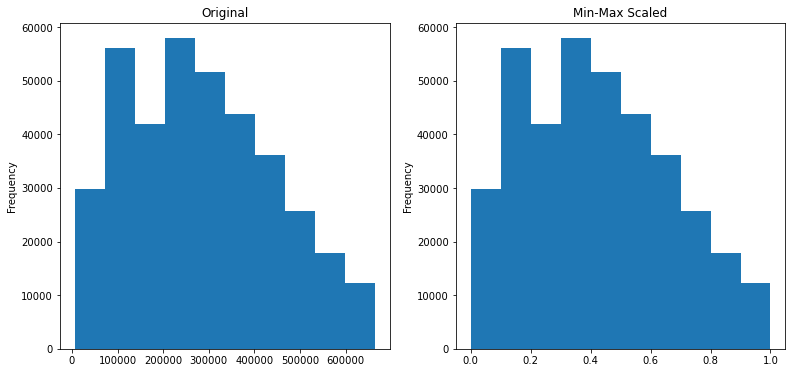

In [27]:
# Visualize the un-scaled and scaled distribution for tax_value

plt.figure(figsize=(13, 6))

# subplot 1
plt.subplot(121)
train.tax_value.plot.hist(title='Original')

#subplot 2
plt.subplot(122)
train.tax_value_scaled.plot.hist(title='Min-Max Scaled');

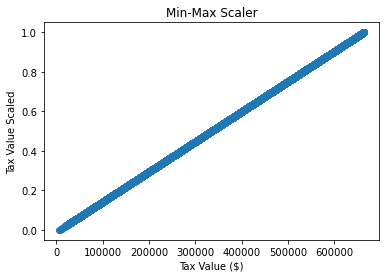

In [28]:
# Visualize the scaling taxamount:

plt.scatter(train.tax_value, train.tax_value_scaled)
plt.xlabel('Tax Value ($)')
plt.ylabel('Tax Value Scaled')
plt.title('Min-Max Scaler');

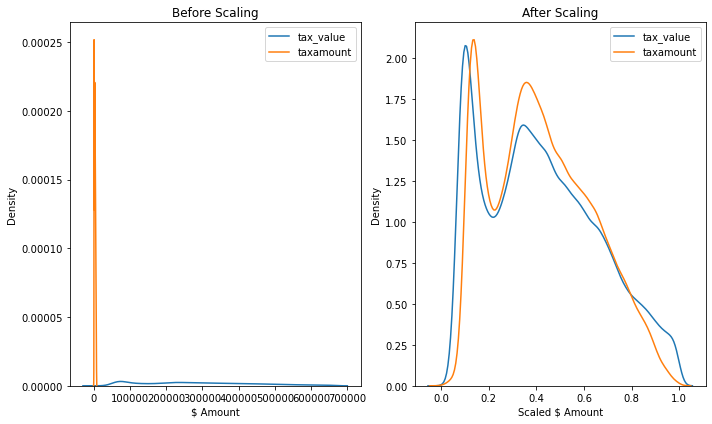

In [29]:
# Distribution of tax_value and taxamount before and after scaling:

plt.figure(figsize = (10,6))

plt.subplot(121)
sns.kdeplot(x = train.tax_value, label = 'tax_value')
sns.kdeplot(x = train.taxamount,label = 'taxamount')
plt.xlabel('$ Amount')
plt.legend()
plt.title('Before Scaling')

plt.subplot(122)
sns.kdeplot(x = train.tax_value_scaled, label = 'tax_value')
sns.kdeplot(x = train.taxamount_scaled,label = 'taxamount')
plt.xlabel('Scaled $ Amount')
plt.title('After Scaling')
plt.legend()


plt.tight_layout()

# Standard Scaler

In [30]:
# 1. create the object
scaler = sklearn.preprocessing.StandardScaler()

# 2. fit the object
scaler.fit(train[['tax_value']])

# 3. use the object. Scale total_bill only
train['tax_value_scaled'] = scaler.transform(train[['tax_value']])
test['tax_value_scaled'] = scaler.transform(test[['tax_value']])
validate['tax_value_scaled'] = scaler.transform(validate[['tax_value']])

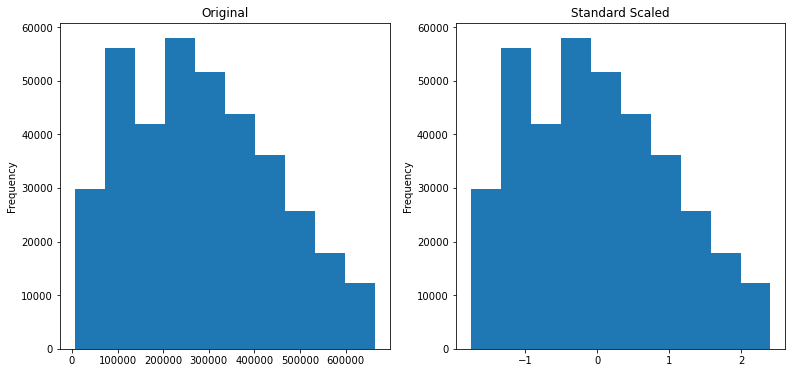

In [31]:
#plot the scaled and unscaled distributions
plt.figure(figsize=(13, 6))

plt.subplot(121)
train.tax_value.plot.hist(title='Original')

plt.subplot(122)
train.tax_value_scaled.plot.hist(title='Standard Scaled');

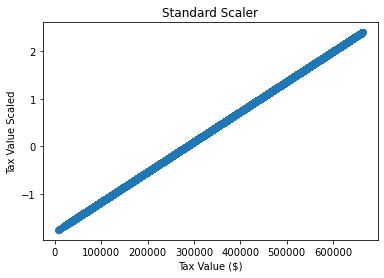

In [32]:
plt.scatter(train.tax_value, train.tax_value_scaled)
plt.xlabel('Tax Value ($)')
plt.ylabel('Tax Value Scaled')
plt.title('Standard Scaler');

# Robust Scaler

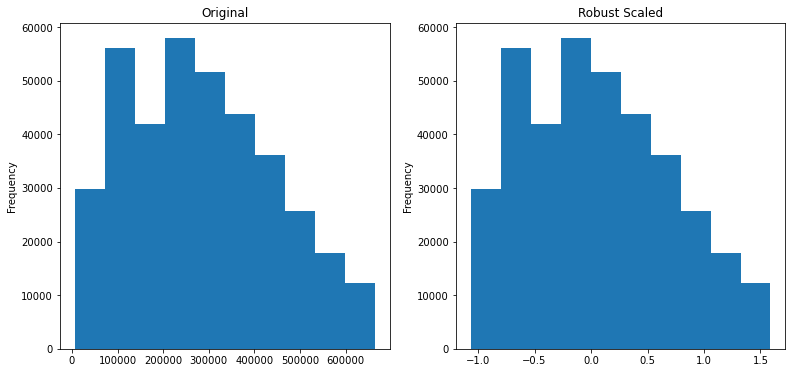

In [33]:
# 1. create the object
scaler = sklearn.preprocessing.RobustScaler()

# 2. fit the object
scaler.fit(train[['tax_value']])

# 3. use the object
train['tax_value_scaled'] = scaler.transform(train[['tax_value']])
test['tax_value_scaled'] = scaler.transform(test[['tax_value']])
validate['tax_value_scaled'] = scaler.transform(validate[['tax_value']])

#plot the scaled and unscaled distributions
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.tax_value.plot.hist(title='Original')
plt.subplot(122)
train.tax_value_scaled.plot.hist(title='Robust Scaled');

# Non-Linear Scalar

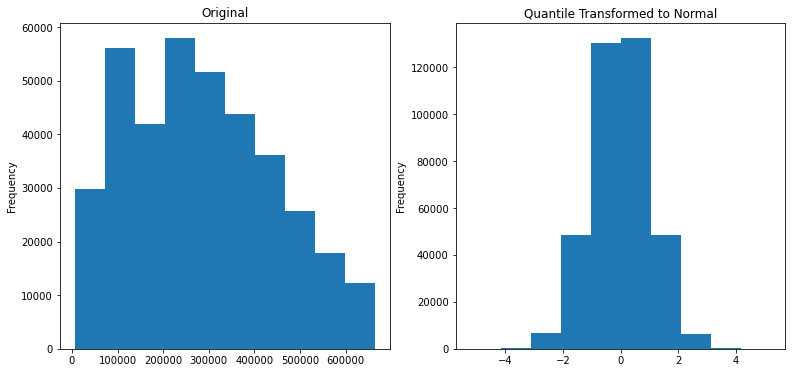

In [34]:
# 1. create the object
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

# 2. fit the object
scaler.fit(train[['tax_value']])

# 3. use the object
train['tax_value_scaled'] = scaler.transform(train[['tax_value']])
test['tax_value_scaled'] = scaler.transform(test[['tax_value']])
validate['tax_value_scaled'] = scaler.transform(validate[['tax_value']])

#plot the scaled and unscaled distribution
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.tax_value.plot.hist(title='Original')
plt.subplot(122)
train.tax_value_scaled.plot.hist(title='Quantile Transformed to Normal');

2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [35]:
train.head()

,bedroomcnt,bathroomcnt,yearbuilt,taxamount,fips,calfinishedsqft,tax_value,tax_value_scaled,taxamount_scaled
1705953,4.0,2.0,1954.0,3614.56,6037.0,1071.0,198654.0,-0.426076,0.428234
1869634,3.0,2.0,1957.0,7441.26,6037.0,1641.0,637884.0,2.267738,0.884155
200490,3.0,2.0,1941.0,2714.01,6037.0,1611.0,214695.0,-0.332733,0.320941
1069665,4.0,2.0,1962.0,1604.27,6037.0,1620.0,80198.0,-1.238097,0.188724
1762774,3.0,2.0,1955.0,2810.88,6059.0,1345.0,227330.0,-0.252887,0.332482


In [38]:
scaler = sklearn.preprocessing.MinMaxScaler()

scaled = scaler.fit_transform(train[['tax_value', 'taxamount']])
scaled

array([[0.29204871, 0.42823426],
       [0.96058752, 0.88415472],
       [0.31646423, 0.32094098],
       ...,
       [0.51414764, 0.51902637],
       [0.46496804, 0.46640972],
       [0.39629833, 0.39492694]])

In [39]:
scaled_df = pd.DataFrame(scaled, index = train.index, columns = ['tax_value', 'taxamount'])
scaled_df.head()

,tax_value,taxamount
1705953,0.292049,0.428234
1869634,0.960588,0.884155
200490,0.316464,0.320941
1069665,0.111750,0.188724
1762774,0.335696,0.332482


In [40]:
scaler.inverse_transform(scaled_df)

array([[198654.  ,   3614.56],
       [637884.  ,   7441.26],
       [214695.  ,   2714.01],
       ...,
       [344573.  ,   4376.61],
       [312262.  ,   3934.98],
       [267146.  ,   3335.  ]])

In [41]:
unscaled_df = pd.DataFrame(scaler.inverse_transform(scaled), index = train.index, columns = ['tax_value', 'taxamount'])
unscaled_df.head()


,tax_value,taxamount
1705953,198654.0,3614.56
1869634,637884.0,7441.26
200490,214695.0,2714.01
1069665,80198.0,1604.27
1762774,227330.0,2810.88


### The resulting dataframe was the exact same. 

3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.